In [2]:
# importing library
import numpy as np
import pandas as pd
import pickle
from sklearn import datasets # sklearn comes with some toy datasets to practise
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from matplotlib import pyplot
from sklearn.metrics import silhouette_score

In [5]:
# importing csv file

df = pd.read_csv('songdf.csv')
df

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,0yLdNVWF3Srea0uzk55zFn,200455
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,1Qrg8KqiBpW07V7PNxwwwL,153947
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,6AQbmUe0Qwf5PZnt4HmTXv,131013
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,5Z2MiIZ5I3jJvvmeWMLbOQ,272373
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,4sx6NRwL6Ol3V6m9exwGlQ,145850
...,...,...,...,...,...,...,...,...,...,...,...
2310,0.740,0.495,-12.981,0.4070,0.09770,0.000495,0.2260,0.491,141.944,0KaFKWa8WC39FE7EPJL6Ld,198199
2311,0.726,0.486,-9.213,0.3790,0.04000,0.000000,0.7660,0.572,159.983,307uhx5f7E58E7VyRVcQ3l,189074
2312,0.823,0.792,-5.477,0.2400,0.00753,0.000012,0.3750,0.334,119.943,5qNxLvbr8yRnbDsNrZT6Bi,213600
2313,0.806,0.715,-5.024,0.2910,0.03050,0.000000,0.3910,0.319,172.138,4E3BSxzGKQrDHBf9QfoewY,133953


In [14]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of       danceability  energy  loudness  speechiness  acousticness  \
0            0.707   0.681    -4.325       0.0668       0.06320   
1            0.644   0.735    -5.747       0.0391       0.05210   
2            0.696   0.809    -8.254       0.0500       0.25200   
3            0.538   0.742    -5.355       0.1140       0.13800   
4            0.662   0.398    -6.691       0.0275       0.71600   
...            ...     ...       ...          ...           ...   
2310         0.740   0.495   -12.981       0.4070       0.09770   
2311         0.726   0.486    -9.213       0.3790       0.04000   
2312         0.823   0.792    -5.477       0.2400       0.00753   
2313         0.806   0.715    -5.024       0.2910       0.03050   
2314         0.780   0.599    -8.283       0.4450       0.04830   

      instrumentalness  liveness  valence    tempo                      id  \
0             0.000005    0.0322    0.646  117.999  0yLdNVWF3Srea0uzk55zFn

In [15]:
df.shape

(2315, 11)

In [16]:
df_num = df.select_dtypes(exclude= ['object'])
df_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,131013
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,272373
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,145850
...,...,...,...,...,...,...,...,...,...,...
2310,0.740,0.495,-12.981,0.4070,0.09770,0.000495,0.2260,0.491,141.944,198199
2311,0.726,0.486,-9.213,0.3790,0.04000,0.000000,0.7660,0.572,159.983,189074
2312,0.823,0.792,-5.477,0.2400,0.00753,0.000012,0.3750,0.334,119.943,213600
2313,0.806,0.715,-5.024,0.2910,0.03050,0.000000,0.3910,0.319,172.138,133953


In [6]:
# scaling

In [17]:
df_num.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000,2315.000000
mean,0.581962,0.564386,-10.342836,0.078529,0.348466,0.153312,0.162821,0.512277,119.484141,206309.113175
std,0.165831,0.275556,7.636129,0.085263,0.355691,0.326460,0.124278,0.252917,28.760099,62231.390599
min,0.107000,0.002900,-40.436000,0.022700,0.000005,0.000000,0.010400,0.036400,48.281000,70160.000000
25%,0.462000,0.422500,-11.296500,0.035050,0.037950,0.000000,0.091900,0.303000,96.983500,160913.500000
50%,0.583000,0.617000,-7.588000,0.045400,0.195000,0.000029,0.113000,0.497000,119.932000,198371.000000
75%,0.704000,0.782000,-5.477000,0.075100,0.640500,0.011250,0.193000,0.732000,136.918500,239310.000000
max,0.975000,0.996000,0.844000,0.843000,0.996000,0.975000,0.893000,0.985000,208.571000,547107.000000


### K-Means is a distance based algorithm: we need to scale / normalize!:

In [19]:
scaler = StandardScaler()
scaler.fit(df_num)
scaled_df = scaler.transform(df_num)
scaled_df_frame = pd.DataFrame(scaled_df, columns = df_num.columns)
display(df_num.head())
print()
display(scaled_df_frame.head())

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.707,0.681,-4.325,0.0668,0.0632,0.000005,0.0322,0.646,117.999,200455
1,0.644,0.735,-5.747,0.0391,0.0521,0.144000,0.1610,0.418,88.980,153947
2,0.696,0.809,-8.254,0.0500,0.2520,0.000128,0.2480,0.857,132.962,131013
3,0.538,0.742,-5.355,0.1140,0.1380,0.000047,0.0934,0.250,96.107,272373
4,0.662,0.398,-6.691,0.0275,0.7160,0.000000,0.1110,0.468,107.001,145850


,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,0.754173,0.423285,0.788244,-0.137596,-0.802179,-0.469705,-1.051262,0.528837,-0.051650,-0.094090
1,0.374185,0.619294,0.601984,-0.462543,-0.833393,-0.028530,-0.014654,-0.372839,-1.060870,-0.841592
2,0.687826,0.887900,0.273606,-0.334676,-0.271267,-0.469328,0.685539,1.363282,0.468732,-1.210199
3,-0.265159,0.644703,0.653330,0.416103,-0.591839,-0.469578,-0.558712,-1.037231,-0.813008,1.061814
4,0.482753,-0.603950,0.478335,-0.598621,1.033519,-0.469721,-0.417064,-0.175103,-0.434138,-0.971731


In [20]:
scaled_df_frame.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03,2.315000e+03
mean,-3.106706e-16,7.195468e-16,-2.709616e-18,-1.055072e-16,-3.475022e-16,1.073679e-15,1.602989e-17,-7.109744e-17,-4.341140e-16,-1.033011e-16
std,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00,1.000216e+00
min,-2.864757e+00,-2.038086e+00,-3.941744e+00,-6.549297e-01,-9.798866e-01,-4.697206e-01,-1.226713e+00,-1.881959e+00,-2.476296e+00,-2.188261e+00
25%,-7.235568e-01,-5.150199e-01,-1.249154e-01,-5.100529e-01,-8.731832e-01,-4.697206e-01,-5.707846e-01,-8.276310e-01,-7.825252e-01,-7.296225e-01
50%,6.260828e-03,1.909771e-01,3.608414e-01,-3.886379e-01,-4.315528e-01,-4.696314e-01,-4.009677e-01,-6.041594e-02,1.557561e-02,-1.275856e-01
75%,7.360784e-01,7.898948e-01,6.373501e-01,-4.022970e-02,8.212097e-01,-4.352526e-01,2.428879e-01,8.689425e-01,6.063305e-01,5.304078e-01
max,2.370629e+00,1.566673e+00,1.465304e+00,8.967941e+00,1.820889e+00,2.517505e+00,5.876625e+00,1.869486e+00,3.098255e+00,5.477485e+00


In [21]:
# clustering with KMeans

In [22]:
kmeans = KMeans(n_clusters=3, random_state=1234)
kmeans.fit(scaled_df_frame)

KMeans(n_clusters=3, random_state=1234)

In [23]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

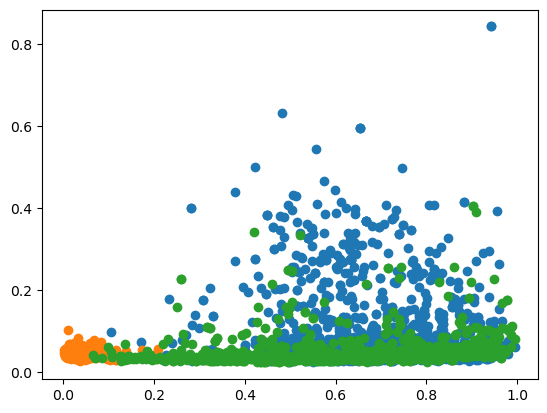

In [24]:
# assign a cluster to each example
labels = kmeans.predict(scaled_df_frame)
# retrieve unique clusters
clusters = np.unique(labels)
# create scatter plot for samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = np.where(labels == cluster)
    # create scatter of these samples
    pyplot.scatter(df_num.to_numpy()[row_ix, 1], df_num.to_numpy()[row_ix, 3])
    # show the plot
pyplot.show()

In [25]:
clusters = kmeans.predict(scaled_df_frame)
#clusters
pd.Series(clusters).value_counts().sort_index()

0    1125
1     322
2     868
dtype: int64

In [26]:
#df_num = pd.DataFrame(df_num)
df_num["cluster"] = clusters
df_num

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
0,0.707,0.681,-4.325,0.0668,0.06320,0.000005,0.0322,0.646,117.999,200455,0
1,0.644,0.735,-5.747,0.0391,0.05210,0.144000,0.1610,0.418,88.980,153947,0
2,0.696,0.809,-8.254,0.0500,0.25200,0.000128,0.2480,0.857,132.962,131013,0
3,0.538,0.742,-5.355,0.1140,0.13800,0.000047,0.0934,0.250,96.107,272373,2
4,0.662,0.398,-6.691,0.0275,0.71600,0.000000,0.1110,0.468,107.001,145850,2
...,...,...,...,...,...,...,...,...,...,...,...
2310,0.740,0.495,-12.981,0.4070,0.09770,0.000495,0.2260,0.491,141.944,198199,0
2311,0.726,0.486,-9.213,0.3790,0.04000,0.000000,0.7660,0.572,159.983,189074,0
2312,0.823,0.792,-5.477,0.2400,0.00753,0.000012,0.3750,0.334,119.943,213600,0
2313,0.806,0.715,-5.024,0.2910,0.03050,0.000000,0.3910,0.319,172.138,133953,0


In [28]:
df_num[df_num['cluster'] == 2].sample()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,cluster
719,0.346,0.768,-5.695,0.0377,0.00603,0.38,0.0244,0.532,169.492,210160,2


In [29]:
kmeans.inertia_

13342.155600334914

### Choosing K

In [30]:
kmeans2 = KMeans(n_clusters=3,
                init="k-means++",
                n_init=30,  # try with 1, 4, 8, 20, 30, 100...
                max_iter=1,
                tol=0,
                algorithm="elkan",
                random_state=1234)
kmeans2.fit(scaled_df_frame)
print(kmeans2.inertia_)

13533.51232403475


Training a K-Means model with 2 clusters! 

Training a K-Means model with 3 clusters! 

Training a K-Means model with 4 clusters! 

Training a K-Means model with 5 clusters! 

Training a K-Means model with 6 clusters! 

Training a K-Means model with 7 clusters! 

Training a K-Means model with 8 clusters! 

Training a K-Means model with 9 clusters! 

Training a K-Means model with 10 clusters! 

Training a K-Means model with 11 clusters! 

Training a K-Means model with 12 clusters! 

Training a K-Means model with 13 clusters! 

Training a K-Means model with 14 clusters! 

Training a K-Means model with 15 clusters! 

Training a K-Means model with 16 clusters! 

Training a K-Means model with 17 clusters! 

Training a K-Means model with 18 clusters! 

Training a K-Means model with 19 clusters! 

Training a K-Means model with 20 clusters! 



Text(0.5, 1.0, 'Elbow Method showing the optimal k')

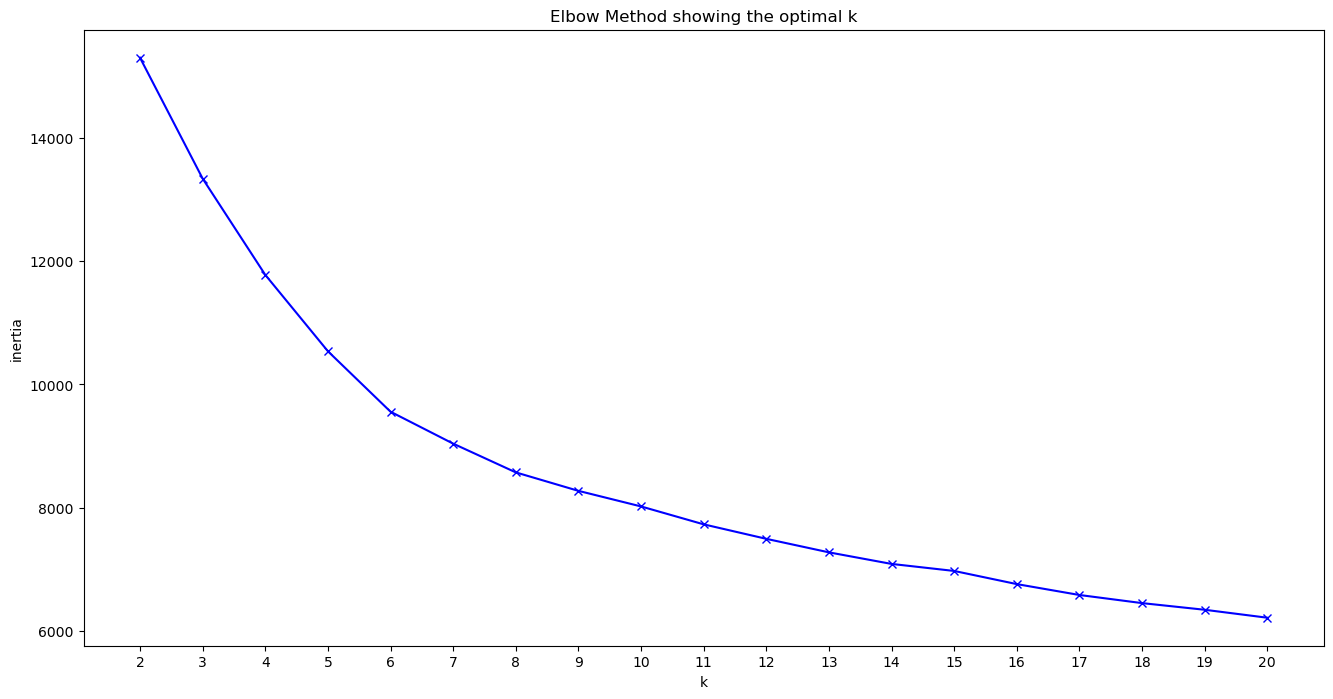

In [31]:
K = range(2, 21)
inertia = []

for k in K:
    print("Training a K-Means model with {} clusters! ".format(k))
    print()
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df_frame)
    inertia.append(kmeans.inertia_)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

### Silhouette

Text(0.5, 1.0, 'Silhouette Method showing the optimal k')

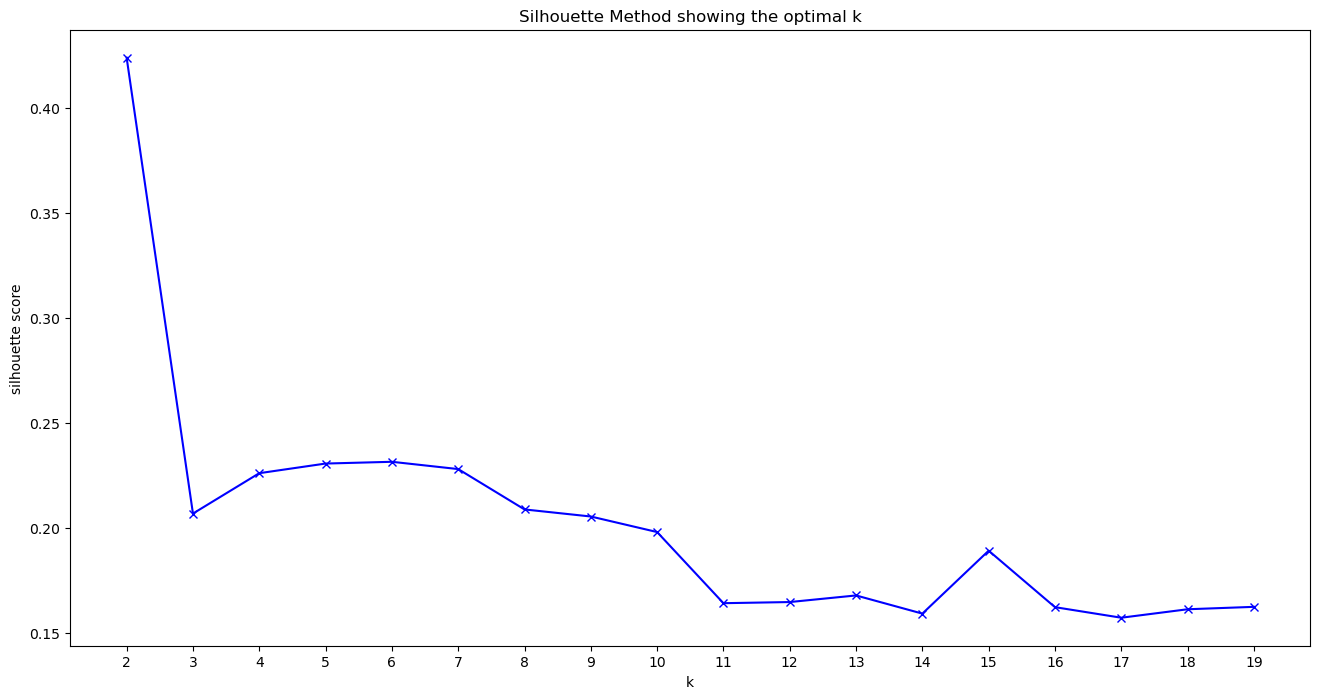

In [33]:
K = range(2, 20)
silhouette = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(scaled_df_frame)
    
    filename = "kmeans_" + str(k) + ".pickle"
    with open(filename, "wb") as f:
        pickle.dump(kmeans,f)
    
    silhouette.append(silhouette_score(scaled_df_frame, kmeans.predict(scaled_df_frame)))


plt.figure(figsize=(16,8))
plt.plot(K, silhouette, 'bx-')
plt.xlabel('k')
plt.ylabel('silhouette score')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Silhouette Method showing the optimal k')

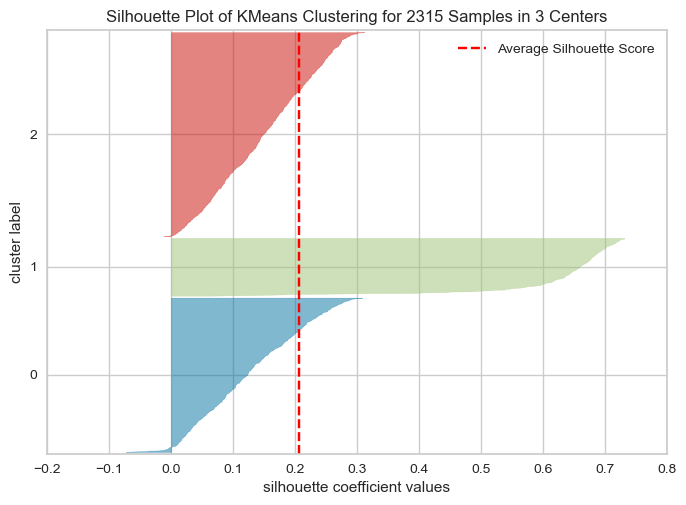

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 2315 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [35]:
from yellowbrick.cluster import SilhouetteVisualizer
model = KMeans(3, random_state=62)
visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
visualizer.fit(scaled_df_frame)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

### saving with pickle

In [36]:
import pickle

#scaler = StandardScaler()
#model = KMeans()

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler,f)

with open("kmeans_4.pickle", "wb") as f:
    pickle.dump(kmeans,f)

In [37]:
def load(filename = "filename.pickle"): 
    try: 
        with open(filename, "rb") as f: 
            return pickle.load(f) 
        
    except FileNotFoundError: 
        print("File not found!") 


In [40]:
scaler2 = load("scaler.pickle")
scaler2

StandardScaler()

In [ ]:
# user input a song
## get the audio features for the song from spotify 
## scale the audio features with scaler that you build the Kmean on 
## predict for the user song(audio features) in which cluster belong to (e.g belongs to 7 )
## got the 100,000000 database and recommed a song that belong to the same cluster of the user input song